In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [23]:
df.drop("Adj Close", axis=1, inplace=True)

In [24]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [25]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [31]:
df.reset_index(inplace=True)

In [32]:
df.head()

,index,Date,Open,High,Low,Close,Volume
0,0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [49]:
from sklearn.model_selection import train_test_split
x=pd.DataFrSame(df["index"])
y=df["Close"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle=False)

In [50]:
X_train.tail()

,index
1683,1683
1684,1684
1685,1685
1686,1686
1687,1687


In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


y_pred = regressor.predict(X_test)

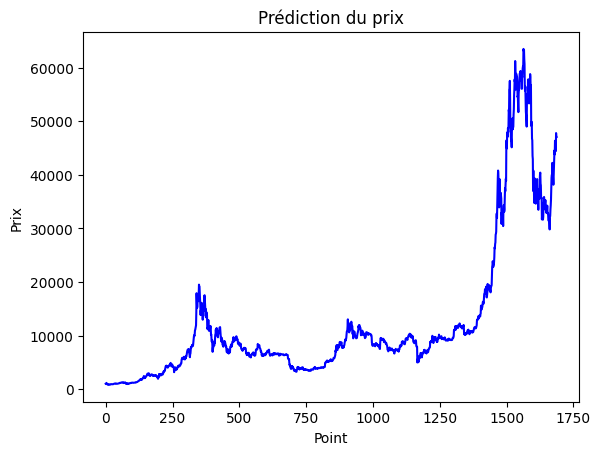

In [56]:
plt.plot(X_train, y_train,color='blue')
plt.title('Prédiction du prix')
plt.xlabel('Point')
plt.ylabel('Prix')
plt.show()

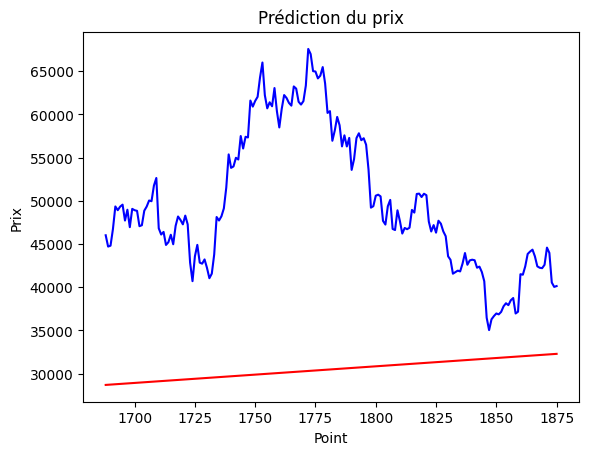

In [58]:
plt.plot(X_test, y_test,color='blue')
plt.plot(X_test, y_pred,color='red')
plt.title('Prédiction du prix')
plt.xlabel('Point')
plt.ylabel('Prix')
plt.show()

In [62]:
regressor.score(X_test, y_test)

-6.000309979639647

In [64]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.37029242979401306